In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [2]:
df = pd.read_csv('CORD19-10k.csv')

In [3]:
df.head(5)

,"Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia"
0,Nitric oxide: a pro-inflammatory mediator in l...
1,Surfactant protein-D and pulmonary host defense
2,Role of endothelin-1 in lung disease
3,Gene expression in epithelial cells in respons...
4,Sequence requirements for RNA strand transfer ...


In [4]:
df = df.rename(columns={'Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia': 'titles'})

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varunvijay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/varunvijay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varunvijay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop = stopwords.words('english')

In [9]:
df.head(5)

,titles
0,Nitric oxide: a pro-inflammatory mediator in l...
1,Surfactant protein-D and pulmonary host defense
2,Role of endothelin-1 in lung disease
3,Gene expression in epithelial cells in respons...
4,Sequence requirements for RNA strand transfer ...


In [10]:
# df['cleaned_titles'] = df['titles'].apply(lambda x: " ".join([word for word in word_tokenize(x.lower()) if all([word not in (stop), word.isalnum() == True, word.isdigit() == False])]))

In [11]:
cleaned_titles = []
for index, row in df.iterrows():

    word_list = []
    for word in word_tokenize(row['titles'].lower()):
        
        
        word = ''.join(e for e in word if e.isalnum())
        temp_word = unidecode.unidecode(word).replace('a','')
        
        if all([word not in (stop), temp_word.isdigit() == False, len(word)>1]):
            
            word_list.append(lemmatizer.lemmatize(word))
    cleaned_titles.append(" ".join(word_list))
    
df['cleaned_titles'] = cleaned_titles

In [12]:
df.head(5)

,titles,cleaned_titles
0,Nitric oxide: a pro-inflammatory mediator in l...,nitric oxide proinflammatory mediator lung dis...
1,Surfactant protein-D and pulmonary host defense,surfactant proteind pulmonary host defense
2,Role of endothelin-1 in lung disease,role endothelin1 lung disease
3,Gene expression in epithelial cells in respons...,gene expression epithelial cell response pneum...
4,Sequence requirements for RNA strand transfer ...,sequence requirement rna strand transfer nidov...


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_titles'])

In [14]:
features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [15]:
features

,0201restricted,101007s0070102004305w,10th,10weekold,10year,10years,10âday,11dichloro1fluoroethane,11th,12month,...,î³secretase,î³âadaptin,î³î,î¼ns,îî²,îî²î³,îî³îî½,îîîîµî½,ï1,ïns
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features = pca.fit_transform(features)

In [17]:
print(pca.explained_variance_ratio_)

[0.00547643 0.00496157]


For clusters: 2 The silhouette score is: 0.6413265422297091


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


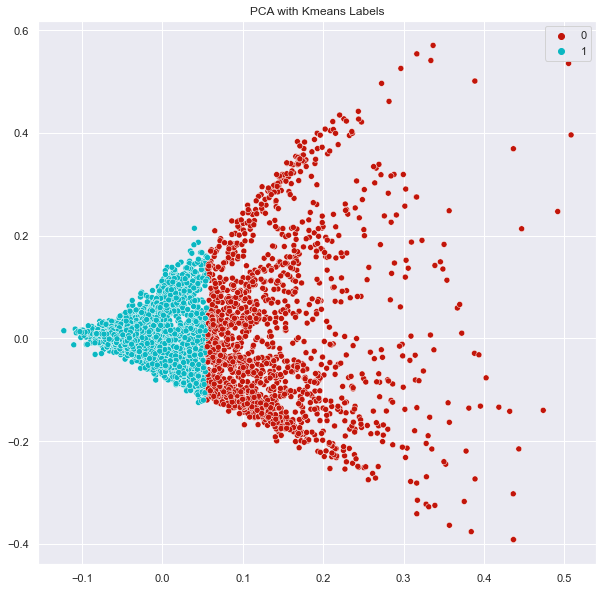

For clusters: 3 The silhouette score is: 0.6544548204541917


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


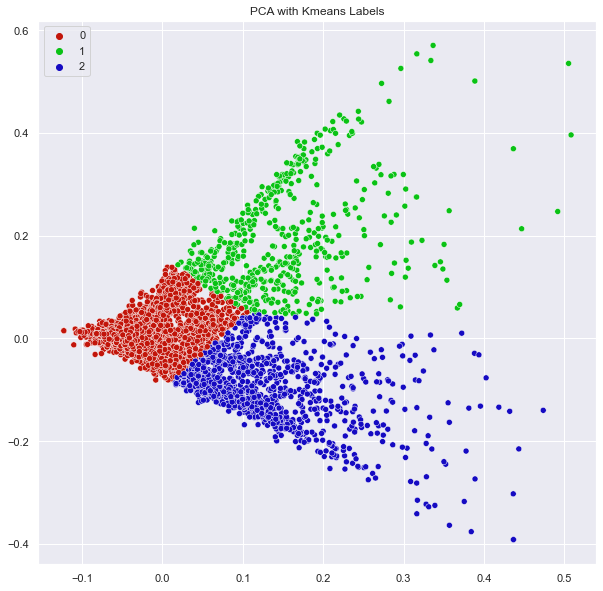

For clusters: 4 The silhouette score is: 0.5907469453953244


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


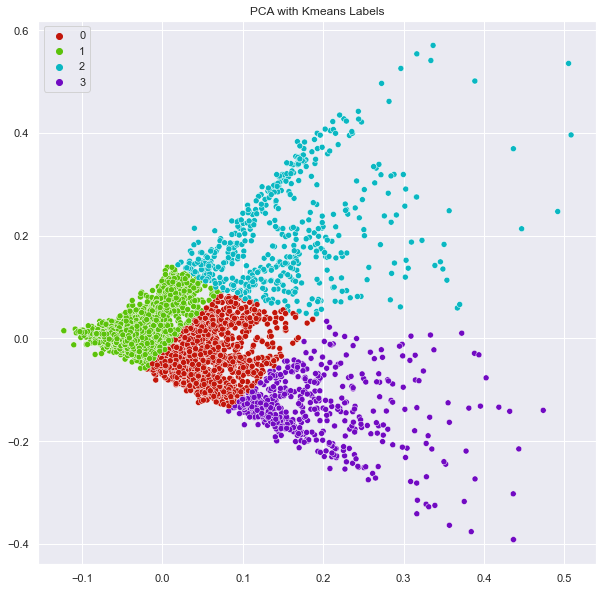

For clusters: 5 The silhouette score is: 0.6238877388393953


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


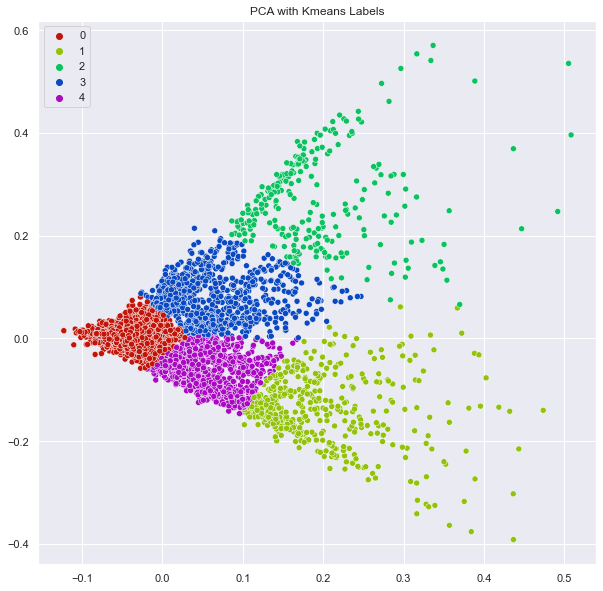

In [18]:
silhouette_scores = {}

for k in range(2,6):
    
    model = KMeans(n_clusters=k, random_state=42)
    y_pred = model.fit_predict(features)
    score = silhouette_score(features, y_pred)
    print('For clusters:',k,'The silhouette score is:',score)
    
    silhouette_scores[k] = score
    sns.set(rc={'figure.figsize':(10,10)})

    # colors
    palette = sns.hls_palette(k, l=.4, s=.9)

    # plot
    sns.scatterplot(features[:,0], features[:,1], hue=y_pred, legend='full', palette=palette)
    plt.title('PCA with Kmeans Labels')
    plt.show()


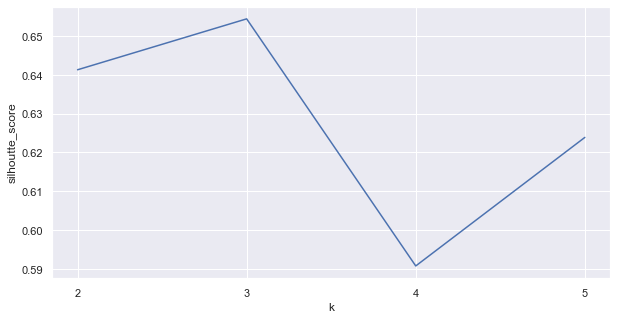

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
silhouette_scores_df = pd.DataFrame(silhouette_scores.items(), columns=['k', 'silhoutte_score'])

ax = sns.lineplot(data=silhouette_scores_df, x="k", y="silhoutte_score")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

The best cluster is with k value as 3, we can see that the graph is linearly separable and the points that are trending in each direction are belonging to their own clusters. And K =3 also achieves the highest silhoutte score. 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value of the silhouette ranges between [1, -1], where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

In [20]:
dataset = df['cleaned_titles'].apply(lambda x: x.split()).to_numpy()
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,0201restricted,101007s0070102004305w,10th,10weekold,10year,10years,10âday,11dichloro1fluoroethane,11th,12month,...,î³secretase,î³âadaptin,î³î,î¼ns,îî²,îî²î³,îî³îî½,îîîîµî½,ï1,ïns
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
frequent_itemsets = apriori(new_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules['antecedent_len'] = rules["antecedents"].apply(lambda x: len(x))

In [43]:
rules[(rules['antecedent_len'] >= 2) & (rules['support']>= 0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len


In [44]:
rules[(rules['antecedent_len'] >= 2) & (rules['support']>= 0.01)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
30,"(acute, respiratory)",(distress),0.019902,0.011501,0.010401,0.522613,45.440070,0.010172,2.070645,2
31,"(acute, distress)",(respiratory),0.010401,0.055106,0.010401,1.000000,18.147005,0.009828,inf,2
32,"(respiratory, distress)",(acute),0.011401,0.038904,0.010401,0.912281,23.449601,0.009957,10.956496,2
35,"(acute, syndrome)",(distress),0.013501,0.011501,0.010301,0.762963,66.337971,0.010146,4.170230,2
36,"(acute, distress)",(syndrome),0.010401,0.028703,0.010301,0.990385,34.504724,0.010002,101.014901,2
37,"(syndrome, distress)",(acute),0.011201,0.038904,0.010301,0.919643,23.638840,0.009865,11.960307,2
41,"(acute, respiratory)",(syndrome),0.019902,0.028703,0.013001,0.653266,22.759617,0.012430,2.801277,2
42,"(acute, syndrome)",(respiratory),0.013501,0.055106,0.013001,0.962963,17.474894,0.012257,25.512151,2
43,"(respiratory, syndrome)",(acute),0.019402,0.038904,0.013001,0.670103,17.224578,0.012246,2.913323,2
47,"(respiratory, syndrome)",(distress),0.019402,0.011501,0.011201,0.577320,50.196683,0.010978,2.338644,2


In [52]:
confidence_buckets = {'0':0 ,'10':0, '20':0, '30':0, '40':0, '50':0, '60':0, '70':0, '80':0, '90':0, '100':0}

for index, row in rules[(rules['antecedent_len'] >= 2)].iterrows():
    
    if row['confidence'] == 0:
        confidence_buckets['0'] += 1
    if row['confidence'] > 0 and row['confidence'] <= 0.10:
        confidence_buckets['10'] += 1
    if row['confidence'] > 0.10 and row['confidence'] <= 0.20:
        confidence_buckets['20'] += 1
    if row['confidence'] > 0.20 and row['confidence'] <= 0.30:
        confidence_buckets['30'] += 1
    if row['confidence'] > 0.30 and row['confidence'] <= 0.40:
        confidence_buckets['40'] += 1
    if row['confidence'] > 0.40 and row['confidence'] <= 0.50:
        confidence_buckets['50'] += 1
    if row['confidence'] > 0.50 and row['confidence'] <= 0.60:
        confidence_buckets['60'] += 1
    if row['confidence'] > 0.60 and row['confidence'] <= 0.70:
        confidence_buckets['70'] += 1
    if row['confidence'] > 0.70 and row['confidence'] <= 0.80:
        confidence_buckets['80'] += 1
    if row['confidence'] > 0.80 and row['confidence'] <= 0.90:
        confidence_buckets['90'] += 1
    if row['confidence'] > 0.90 and row['confidence'] <= 1:
        confidence_buckets['100'] += 1
        

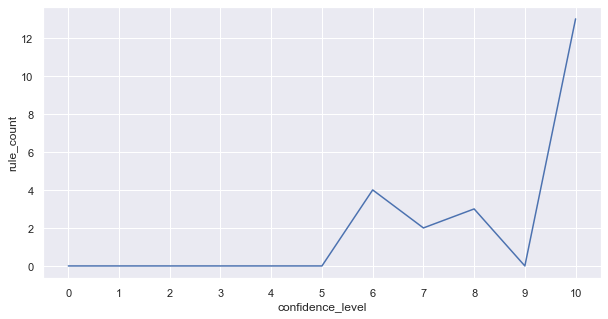

In [54]:
confidence_buckets_df = pd.DataFrame(confidence_buckets.items(), columns=['confidence_level', 'rule_count'])

ax = sns.lineplot(data=confidence_buckets_df, x="confidence_level", y="rule_count")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()